# Length distributions

Here we plot the distribution of chant lengths in two different genres: antiphons and responsories. We use the subset without melody variants, as this more closely approximates an independent sample.

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import sys
sys.path.append('../')
from src.volpiano import clean_volpiano, expand_accidentals
from helpers import cm2inch
# matplotlib.style.use('styles.mplstyle')

Populating the interactive namespace from numpy and matplotlib


In [2]:
resp_df = pd.read_csv('../data/run-1/responsory/subset/train-representation-pitch.csv', index_col=0)
anti_df = pd.read_csv('../data/run-1/antiphon/subset/train-representation-pitch.csv', index_col=0)

## Chant lengths

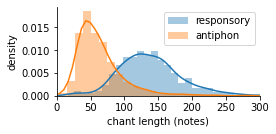

In [3]:
figure(figsize=cm2inch(10,5))
resp_lengths = resp_df['words'].str.replace(' ', '').str.len()
anti_lengths = anti_df['words'].str.replace(' ', '').str.len()
sns.distplot(resp_lengths, label='responsory')
sns.distplot(anti_lengths, label='antiphon')
xlabel('chant length (notes)')
ylabel('density')
xlim(0, 300)
plt.legend()
sns.despine()
plt.tight_layout()
savefig('../figures/figS03-chant-length-distribution.pdf')

## Textual units

In [4]:
def get_unit_lengths(df, unit):
    units = df[unit].str.split()
    lengths = units.map(lambda x: [len(el) for el in x])
    return list(flatten(lengths))

In [5]:
data_points = (
    [('responsory', 'neume', el) for el in get_unit_lengths(resp_df, 'neumes')] + 
    [('responsory', 'syllable', el) for el in get_unit_lengths(resp_df, 'syllables')] +
    [('responsory', 'word', el) for el in get_unit_lengths(resp_df, 'words')] +
    [('antiphon', 'neume', el) for el in get_unit_lengths(anti_df, 'neumes')] + 
    [('antiphon', 'syllable', el) for el in get_unit_lengths(anti_df, 'syllables')] +
    [('antiphon', 'word', el) for el in get_unit_lengths(anti_df, 'words')]
)
df = pd.DataFrame(data_points, columns=['genre', 'unit', 'length'])

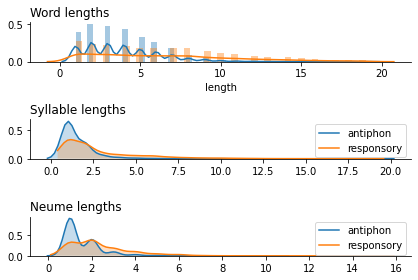

In [6]:
subplot(311)
sns.distplot(df.query('genre=="antiphon" & unit=="word" & length<20')['length'], label='antiphon')
sns.distplot(df.query('genre=="responsory" & unit=="word" & length<20')['length'], label='responsory')
title('Word lengths', x=0, ha='left')

subplot(312)
sns.kdeplot(df.query('genre=="antiphon" & unit=="syllable" & length<20')['length'], label='antiphon', bw=.4, shade=True)
sns.kdeplot(df.query('genre=="responsory" & unit=="syllable" & length<20')['length'], label='responsory', shade=True, bw=.2)
title('Syllable lengths', x=0, ha='left')


subplot(313)
sns.kdeplot(df.query('genre=="antiphon" & unit=="neume" & length<20')['length'], label='antiphon', bw=.35, shade=True)
sns.kdeplot(df.query('genre=="responsory" & unit=="neume" & length<20')['length'], label='responsory', shade=True, bw=.3)
title('Neume lengths', x=0, ha='left')

sns.despine()
plt.tight_layout()

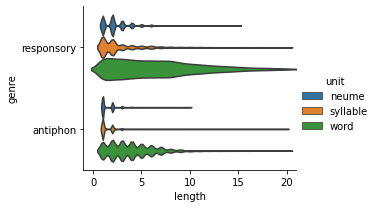

In [7]:
g = sns.catplot(y='genre', x='length', data=df.query('length<=20'), 
                hue='unit', aspect=1.5, height=3,
                scale='width',
                inner=None,
                kind='violin')
g.set(xlim=(-1,21))
plt.savefig('../figures/figS06-unit-length-distribution.pdf')

In [8]:
pd.pivot_table(df, index='genre', columns='unit', values='length')

unit,neume,syllable,word
genre,,,
antiphon,1.500977,1.547046,3.982449
responsory,2.319194,2.956519,7.116240


In [9]:
df

,genre,unit,length
0,responsory,neume,2
1,responsory,neume,2
2,responsory,neume,1
3,responsory,neume,1
4,responsory,neume,2
...,...,...,...
450985,antiphon,word,1
450986,antiphon,word,6
450987,antiphon,word,2
450988,antiphon,word,1
